In [1]:
import os, cv2, random, numpy as np

file_names = os.listdir("dataset")
data = []
target = []
for file in file_names:
    im = cv2.imread("dataset/"+file,cv2.IMREAD_GRAYSCALE)
    height, width = im.shape[:2] 
    lbl = file.split("_")[1]
    data.append(im)
    target.append(int(lbl))

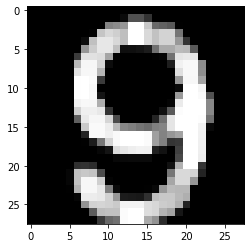

In [2]:
import matplotlib.pyplot as plt
plt.imshow(data[80],cmap="gray")

In [3]:
len(data)

112

In [4]:
target_onehot = []
for label in target:
    ohetgt = [0 for _ in range(9)]
    ohetgt[label-1] = 1
    target_onehot.append(ohetgt)

In [5]:
data = np.array(data,dtype="float32")
target = np.array(target_onehot,dtype="float32")

In [6]:
data = data.reshape((data.shape[0],28,28,1))

In [7]:
data.shape

(112, 28, 28, 1)

In [8]:
target.shape

(112, 9)

In [9]:
import keras
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255)


Using TensorFlow backend.


In [10]:
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [11]:
datagen.fit(data)

In [12]:
epochs = 350
batch_size=20
history = model.fit(datagen.flow(data, target, batch_size=batch_size),
        epochs=epochs, verbose=0)

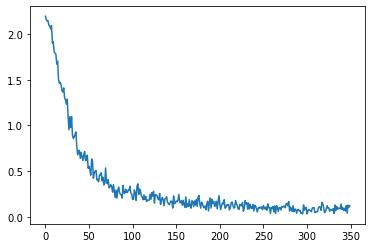

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='MAE (training data)')
plt.show()

In [14]:
val_results = model.predict(data)
correct = 0
for res, tgt in zip(val_results,target):
    if(np.argmax(res)==np.argmax(tgt)):
        correct+=1
print("accuracy:",correct,"out of",data.shape[0],"correct")

accuracy: 112 out of 112 correct


(1, 28, 28, 1)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

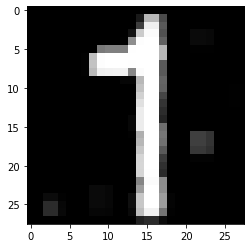

In [15]:
idx = 30
print(np.array([data[idx]]).shape)
res = model.predict(np.array([data[idx]]))
test = data[idx].reshape((28,28))
plt.imshow(test,cmap="gray")
res

In [17]:
model.save("model.h5")